Name: Fahmi Sajid Ahmed
Student Number: 300250180

This is CSI4142 A1. The purpose of this analysis is to uncover and present various findings regarding the datasets on mobile data usage and indian engineering college placements. This is being done mainly to help future AI developers understand the basics of exploratory data analysis.

The second dataset to be presented here is called the Indian Engineering College Placement Dataset, written by a user named Vishard Mehta. The data was synthetically generated, designed for ML, data analysis, and educational research practice.
The data consists of roughly 5000 rows and 26 columns (split across two different .csv files).
Of the 22 features, the 10 that have been selected for analysis include:

gender, a categorical feature that represents the student's gender.
tenth_percentage, a numerical feature that represents the percentage score achieved in 10th grade (representing early academic performance).

twelfth_percentage, a numerical feature that represents the percentage score achieved in 12th grade (representing pre-university academic performance).

study_hours_per_day, a numerical feature that represents the number of hours spent each day studying.

attendance_percentage, a numerical feature that represents the percent of college classes attended.

coding_skill_rating, a categorical feature that represents the student's self-evaluation of their coding skills (between 1 and 5).

communication_skill_rating, a categorical feature that represents the student's self-evaluation of their communication skills (between 1 and 5).

aptitude_skill_rating, a categorical feature that represents the student's self-evaluation of their problem-solving skills (between 1 and 5).

sleep_hours, a numerical feature that represents the average amount of time spent sleeping (daily).

stress_level, a categorical feature that represents the students' self-reported levels of stress (between 1 and 10).

The dataset is partially incomplete, missing values in the salary column for students who have NOT been placed (should be NaN). The dataset does not contain any redundant entries.

In [5]:
# Preparation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

url = "https://raw.githubusercontent.com/Fahmi-IT/CSI4142_A1/refs/heads/second_dataset/Data/indian_engineering_student_placement.csv?token=GHSAT0AAAAAADTQKG3AR6H4MXQND7ZIY2QW2MCYNEQ";
df = pd.read_csv(url);

features = [
    'gender', 'tenth_percentage', 'twelfth_percentage', 
    'study_hours_per_day', 'attendance_percentage', 'coding_skill_rating',
    'communication_skill_rating', 'aptitude_skill_rating', 
    'sleep_hours', 'stress_level'
];

df_analysis = df[features].copy();

Most students study between 3 to 6 hours daily, a relatively normal distribution and an average of 4 hours a day.

The result of the univariate analysis on the sleep_hours column (numerical attribute) is shown as both a histogram and a boxplot. (corresponds to the r1 requirement)

The data was taken from the sleep_hours column, upon which a two-subplot figure consisting of a histogram (via the hist function) and a boxplot (via the boxplot function) was created.

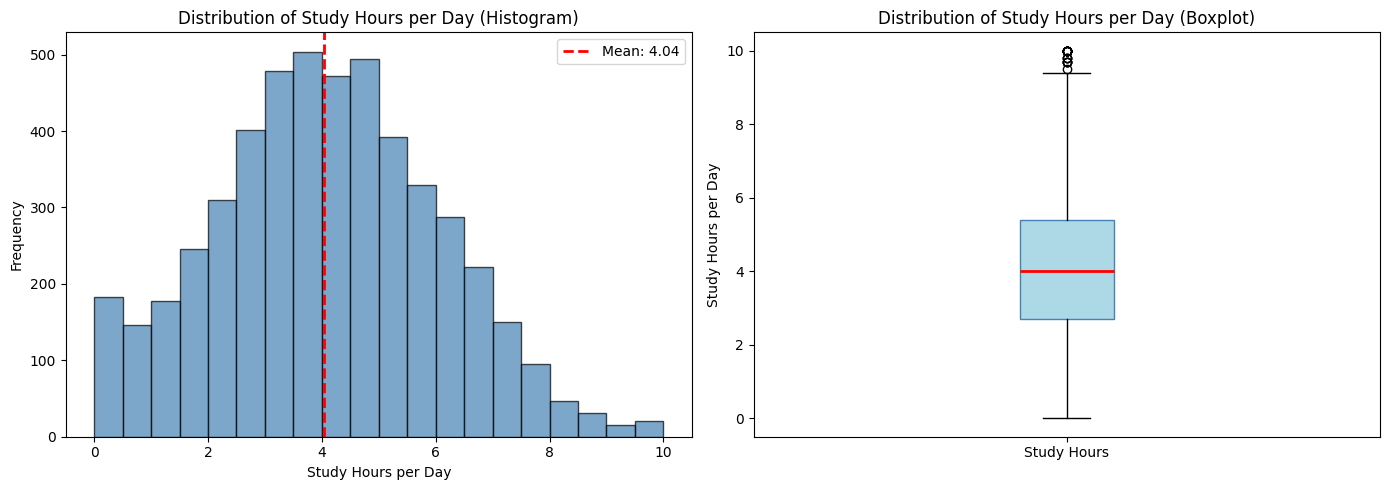

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5));

# Histogram
axes[0].hist(df_analysis['study_hours_per_day'], bins=20, color='steelblue', edgecolor='black', alpha=0.7);
axes[0].set_xlabel('Study Hours per Day');
axes[0].set_ylabel('Frequency');
axes[0].set_title('Distribution of Study Hours per Day (Histogram)');
axes[0].axvline(df_analysis['study_hours_per_day'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_analysis["study_hours_per_day"].mean():.2f}');
axes[0].legend();

# Boxplot
axes[1].boxplot(df_analysis['study_hours_per_day'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='steelblue'),
                medianprops=dict(color='red', linewidth=2));
axes[1].set_ylabel('Study Hours per Day');
axes[1].set_title('Distribution of Study Hours per Day (Boxplot)');
axes[1].set_xticklabels(['Study Hours']);

plt.tight_layout();
plt.show();

Stress levels show a relatively uniform distribution, with a clear peak at extreme stress (10) and a slight peak at moderate stress (6), which tells us that the majority of students undergo higher levels of stress.

This insight was reached after applying the bar function on the stress_level column (which is being considered as a categorical attribute), producing a countplot (via the bar function) with multiple values. (corresponds to the r2 requirement)

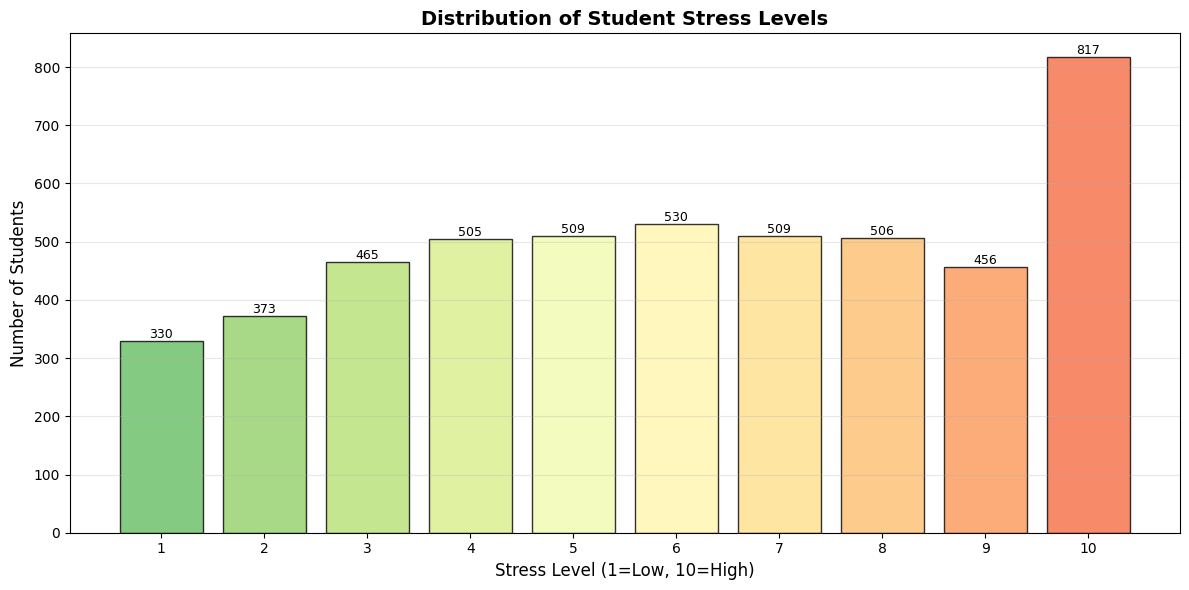

In [7]:
plt.figure(figsize=(12, 6));

# Count Plot
stress_counts = df_analysis['stress_level'].value_counts().sort_index();
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(stress_counts)));

bars = plt.bar(stress_counts.index, stress_counts.values, color=colors, edgecolor='black', alpha=0.8);
plt.xlabel('Stress Level (1=Low, 10=High)', fontsize=12);
plt.ylabel('Number of Students', fontsize=12);
plt.title('Distribution of Student Stress Levels', fontsize=14, fontweight='bold');
plt.xticks(range(1, 11));
plt.grid(axis='y', alpha=0.3);

for bar in bars:
    height = bar.get_height();
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9);

plt.tight_layout();
plt.show();

Communication skills are fairly balanced across groups, with a slight majority having medium to high communication abilities.

This insight was reached after performing univariate analysis on the communication_skill_rating attribute after being grouped (which is being considered as a categorical attribute). (corresponds to the r3 requirement)

The levels of communication (1 - 5) are grouped to form 3 different ranges, corresponding to various levels of communication (weak, average, strong). Then, the data is visualized in the form of a countplot (via the bar function).

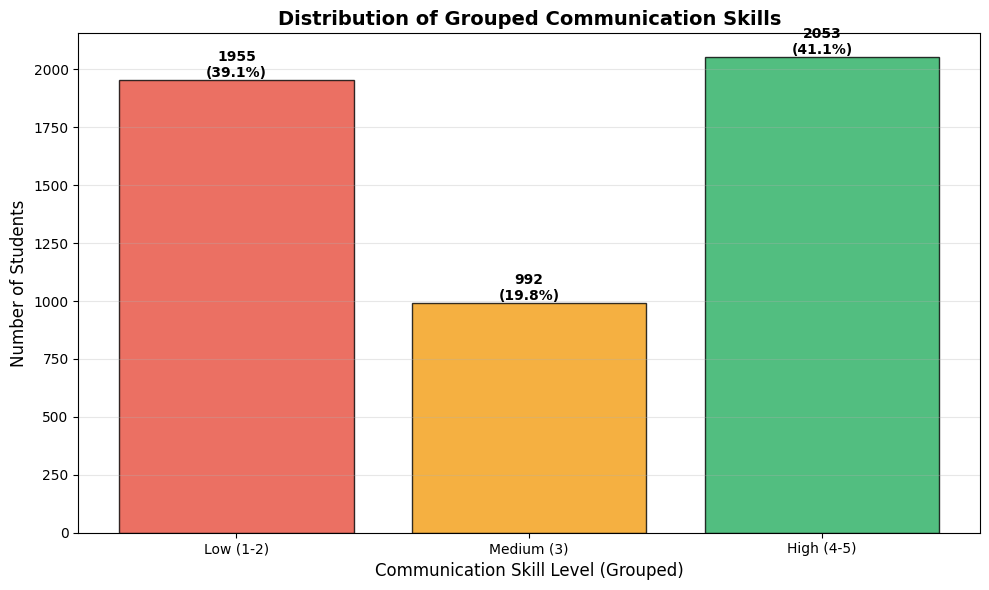

In [8]:
# Categorization Function
def group_communication_skills(rating):
    if rating <= 2:
        return 'Low (1-2)';
    elif rating == 3:
        return 'Medium (3)';
    else:
        return 'High (4-5)';

df_analysis['comm_skill_grouped'] = df_analysis['communication_skill_rating'].apply(group_communication_skills);

# Plotting Order
order = ['Low (1-2)', 'Medium (3)', 'High (4-5)'];
grouped_counts = df_analysis['comm_skill_grouped'].value_counts()[order];

plt.figure(figsize=(10, 6));
colors = ['#e74c3c', '#f39c12', '#27ae60'];
bars = plt.bar(grouped_counts.index, grouped_counts.values, color=colors, edgecolor='black', alpha=0.8);
plt.xlabel('Communication Skill Level (Grouped)', fontsize=12);
plt.ylabel('Number of Students', fontsize=12);
plt.title('Distribution of Grouped Communication Skills', fontsize=14, fontweight='bold');
plt.grid(axis='y', alpha=0.3);

total = len(df_analysis);
for bar in bars:
    height = bar.get_height();
    percentage = (height / total) * 100;
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold');

plt.tight_layout();
plt.show();

Both genders show similar attendance patterns with minimal differences in mean and distribution. This means that gender has no relationship with attendance.

This insight was reached after performing bivariate analysis between the numerical feature, attendance_percentage, and the categorical feature, gender. (corresponds to the r4 requirement)

The attendance_percentage data is grouped by gender, using a boxplot (via the boxplot function) to summarize the distribution statistics and violin plot (via the violinplot function) to show kernel density.

C:\Users\16132\AppData\Local\Temp\ipykernel_13284\2220368275.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_analysis, x='gender', y='attendance_percentage', ax=axes[1], palette='Set2', hue=None, legend=False);


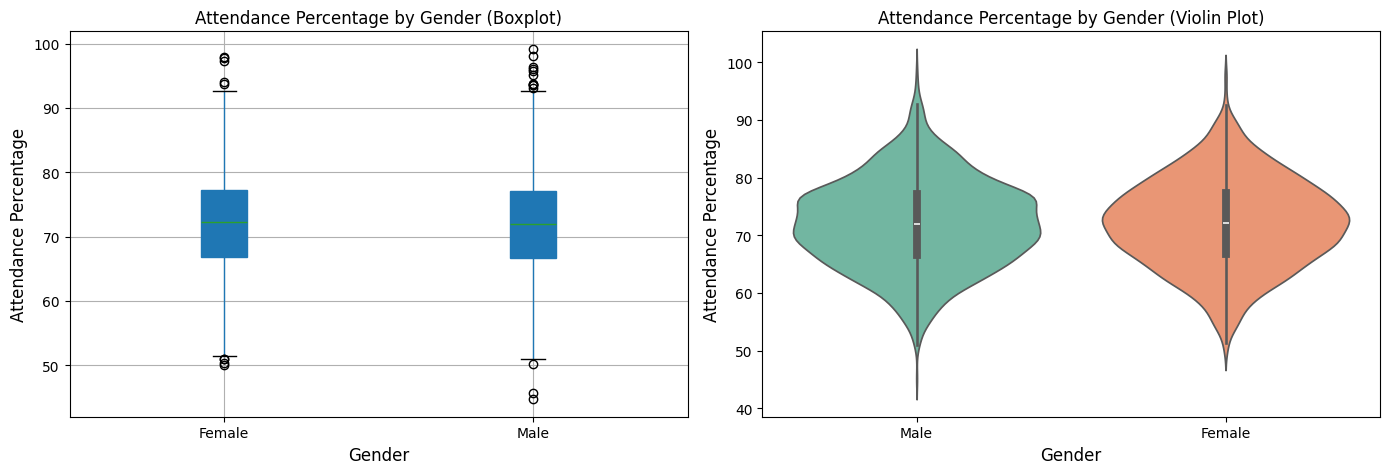

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5));

# Box Plot
df_analysis.boxplot(column='attendance_percentage', by='gender', ax=axes[0], patch_artist=True);
axes[0].set_xlabel('Gender', fontsize=12);
axes[0].set_ylabel('Attendance Percentage', fontsize=12);
axes[0].set_title('Attendance Percentage by Gender (Boxplot)');
plt.sca(axes[0]);
plt.xticks([1, 2], ['Female', 'Male']);

# Violin Plot
sns.violinplot(data=df_analysis, x='gender', y='attendance_percentage', ax=axes[1], palette='Set2', hue=None, legend=False);
axes[1].set_xlabel('Gender', fontsize=12);
axes[1].set_ylabel('Attendance Percentage', fontsize=12);
axes[1].set_title('Attendance Percentage by Gender (Violin Plot)');

plt.suptitle('');
plt.tight_layout();
plt.show();

Coding skill distributions are very similar across genders, suggesting no relationship between coding skill and gender.

This insight was reached after performing bivariate analysis between the categorical feature, coding_skill_rating, and the categorical feature, gender. (corresponds to the r5 requirement)

Cross-tabulations of coding_skill_rating and gender data were taken and visualized as grouped (via the plot function) and stacked (via the crosstab and plot functions) bar charts.

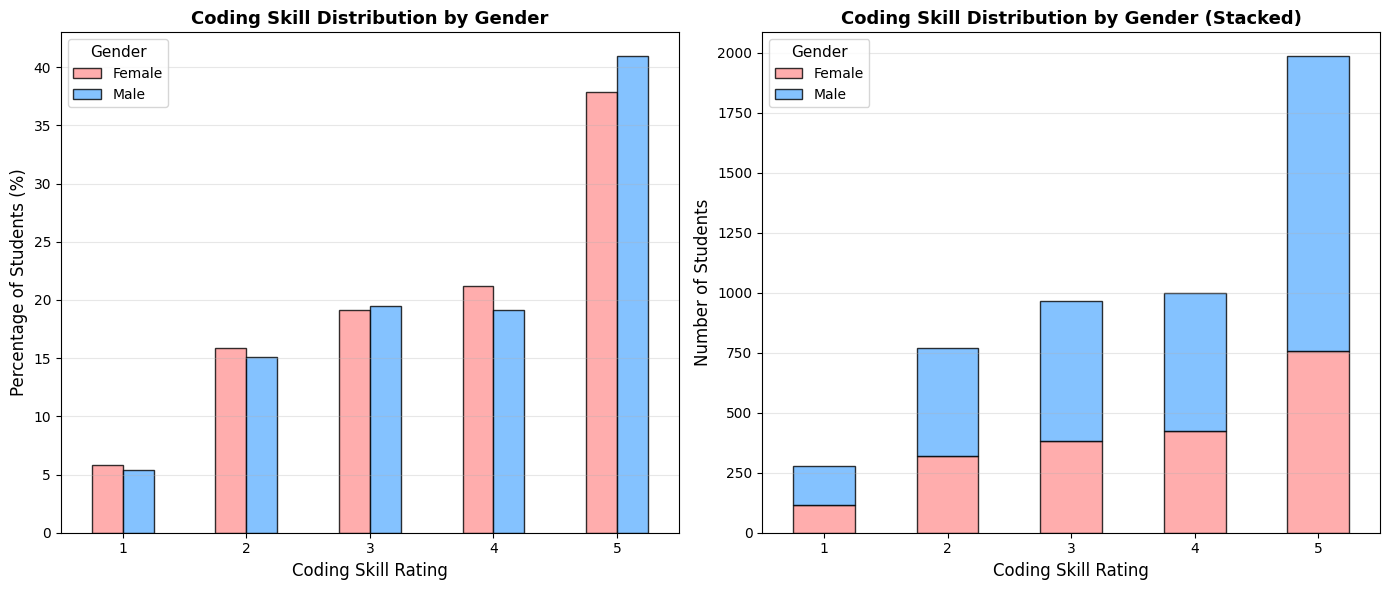

In [10]:
ct = pd.crosstab(df_analysis['coding_skill_rating'], df_analysis['gender'], normalize='columns') * 100;

fig, axes = plt.subplots(1, 2, figsize=(14, 6));

# Grouped Bar Chart
ct.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff'], edgecolor='black', alpha=0.8);
axes[0].set_xlabel('Coding Skill Rating', fontsize=12);
axes[0].set_ylabel('Percentage of Students (%)', fontsize=12);
axes[0].set_title('Coding Skill Distribution by Gender', fontsize=13, fontweight='bold')
axes[0].legend(title='Gender', title_fontsize=11);
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0);
axes[0].grid(axis='y', alpha=0.3);

# Stacked Bar Chart
ct_counts = pd.crosstab(df_analysis['coding_skill_rating'], df_analysis['gender']);
ct_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['#ff9999', '#66b3ff'], edgecolor='black', alpha=0.8);
axes[1].set_xlabel('Coding Skill Rating', fontsize=12);
axes[1].set_ylabel('Number of Students', fontsize=12);
axes[1].set_title('Coding Skill Distribution by Gender (Stacked)', fontsize=13, fontweight='bold');
axes[1].legend(title='Gender', title_fontsize=11);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0);
axes[1].grid(axis='y', alpha=0.3);

plt.tight_layout();
plt.show();

While aptitude rating 4 is most common, the stress levels appear to be distributed evenly relative to the number of students (the same distribution of stress appears in each aptitude skill group).

This insight was reached after performing bivariate analysis between the categorical feature aptitude_skill_rating and the categorical feature stress_level. (corresponds to the r6 requirement)

The data from the stress_level column was collected and organized according to aptitude_skill_rating, resulting in a grouped multi-series bar chart (created using the plot function).

<Figure size 1400x600 with 0 Axes>

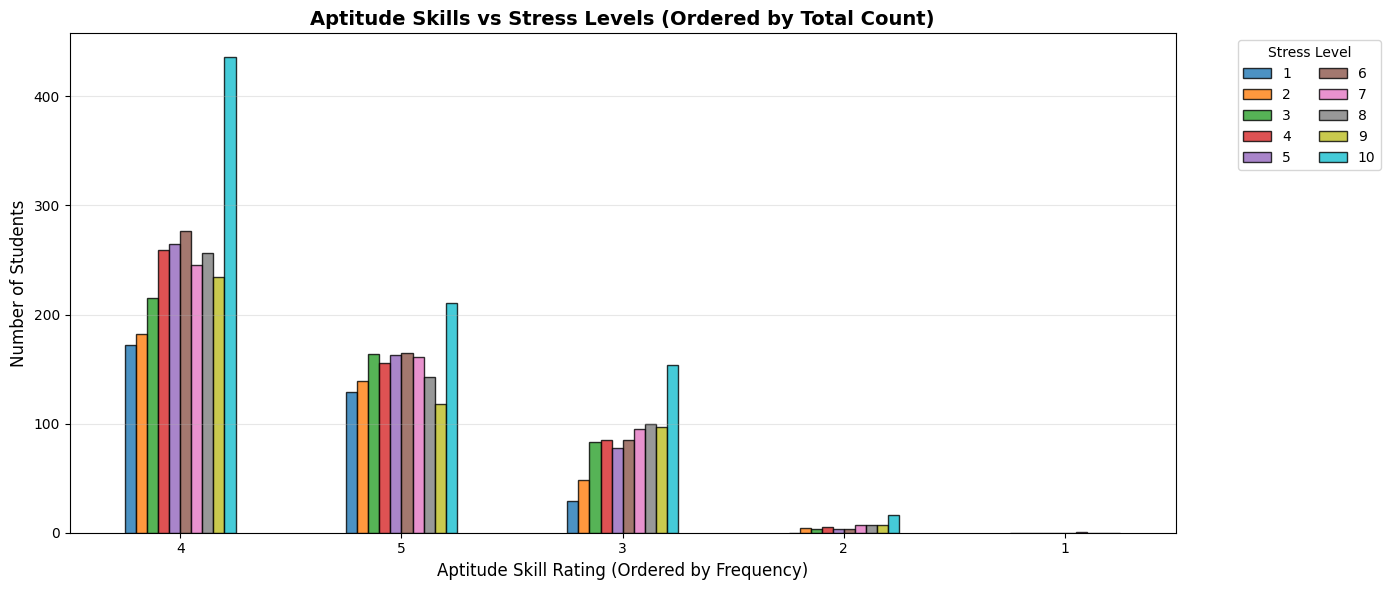

In [11]:
ct_aptitude = pd.crosstab(df_analysis['aptitude_skill_rating'], df_analysis['stress_level']);

aptitude_order = ct_aptitude.sum(axis=1).sort_values(ascending=False).index;
ct_aptitude_ordered = ct_aptitude.loc[aptitude_order];

# Multi-Bar Chart ordering Aptitude Ratings by Total Frequency
plt.figure(figsize=(14, 6));
ct_aptitude_ordered.plot(kind='bar', stacked=False, figsize=(14, 6), 
                         colormap='tab10', edgecolor='black', alpha=0.8);
plt.xlabel('Aptitude Skill Rating (Ordered by Frequency)', fontsize=12);
plt.ylabel('Number of Students', fontsize=12);
plt.title('Aptitude Skills vs Stress Levels (Ordered by Total Count)', fontsize=14, fontweight='bold');
plt.legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2);
plt.xticks(rotation=0);
plt.grid(axis='y', alpha=0.3);
plt.tight_layout();
plt.show();

Most students study 3-6 hours daily, with gender proportions remaining consistent across all categories, implying little correlation between the two attributes.

This insight was reached after performing bivariate analysis between the processed numerical feature, study_hours_binned (study_hours_per_day binned into 3 categories), and the categorical feature, gender. (corresponds to the r7 requirement)

The data from study_hours_per_day is discretized into 3 distinct categorical bins, which is then cross-examined with gender using raw counts and normalized percentages. The results are visualized through the use of grouped bar charts (created using the plot function).

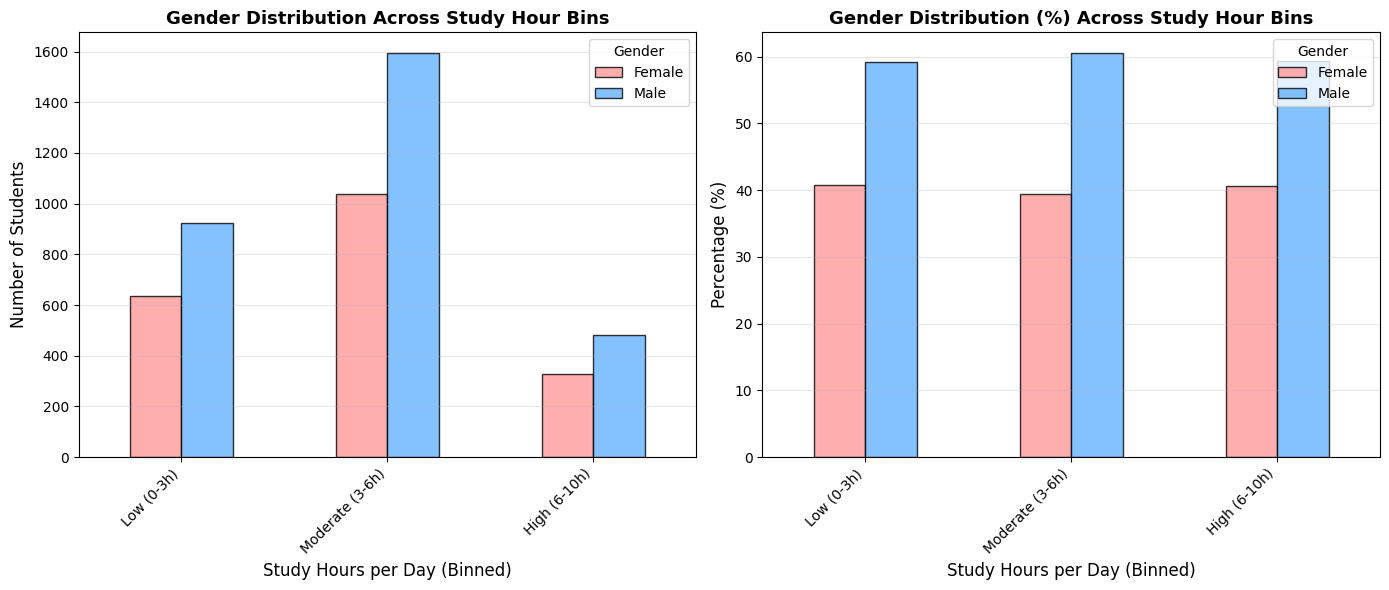

In [12]:
bins = [0, 3, 6, 10];
labels = ['Low (0-3h)', 'Moderate (3-6h)', 'High (6-10h)'];
df_analysis['study_hours_binned'] = pd.cut(df_analysis['study_hours_per_day'], bins=bins, labels=labels, include_lowest=True);

ct_study = pd.crosstab(df_analysis['study_hours_binned'], df_analysis['gender']);

fig, axes = plt.subplots(1, 2, figsize=(14, 6));

# Count Plot
ct_study.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff'], edgecolor='black', alpha=0.8);
axes[0].set_xlabel('Study Hours per Day (Binned)', fontsize=12);
axes[0].set_ylabel('Number of Students', fontsize=12);
axes[0].set_title('Gender Distribution Across Study Hour Bins', fontsize=13, fontweight='bold');
axes[0].legend(title='Gender');
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right');
axes[0].grid(axis='y', alpha=0.3);

# Percentage Plot
ct_study_pct = pd.crosstab(df_analysis['study_hours_binned'], df_analysis['gender'], normalize='index') * 100;
ct_study_pct.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff'], edgecolor='black', alpha=0.8);
axes[1].set_xlabel('Study Hours per Day (Binned)', fontsize=12);
axes[1].set_ylabel('Percentage (%)', fontsize=12);
axes[1].set_title('Gender Distribution (%) Across Study Hour Bins', fontsize=13, fontweight='bold');
axes[1].legend(title='Gender');
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right');
axes[1].grid(axis='y', alpha=0.3);

plt.tight_layout();
plt.show();

There is some positive correlation between the 10th and 12th grade scores, suggesting that students who perform well in the 10th grade tend to perform well in the 12th grade.

This insight was reached after performing bivariate analysis between the numerical feature, tenth_percentage, and the numerical feature, twelfth_percentage. (corresponds to the r8 requirement)

The tenth_percentage data and twelfth_percentage data are paired and plotted as a scatter plot (using the scatter function), fitting a least-squares trend line to show the strength and direction of the relationship.

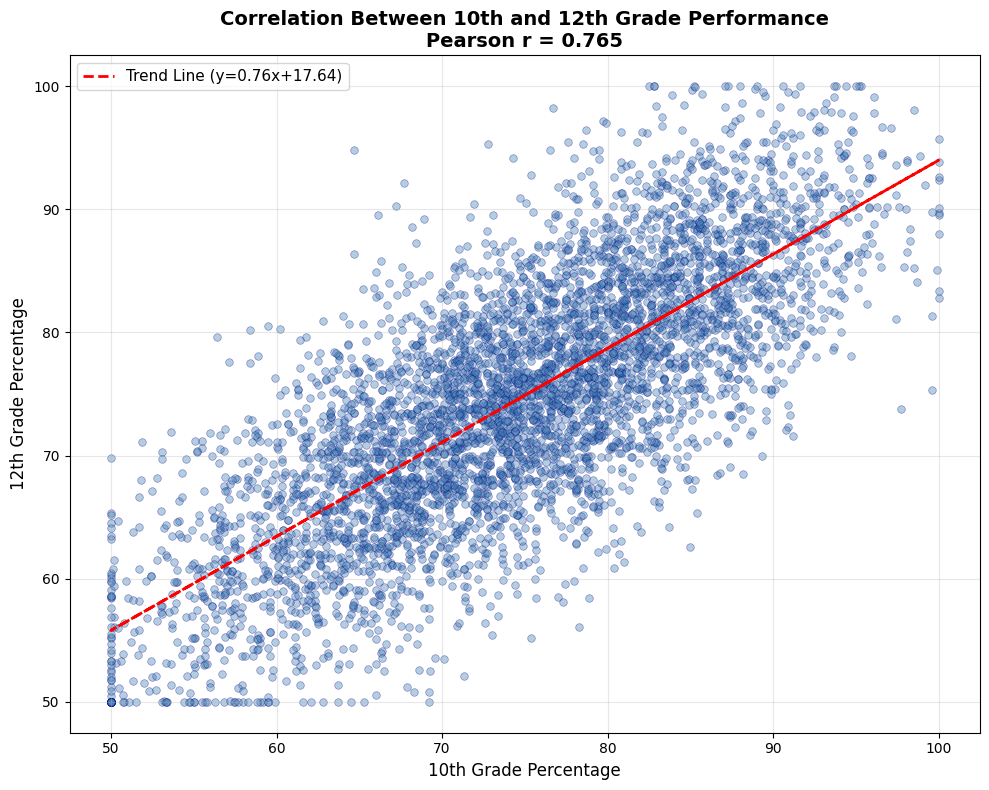

In [13]:
correlation = df_analysis['tenth_percentage'].corr(df_analysis['twelfth_percentage'])

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 8));
plt.scatter(df_analysis['tenth_percentage'], df_analysis['twelfth_percentage'], 
            alpha=0.4, s=30, c='steelblue', edgecolor='navy', linewidth=0.5);

z = np.polyfit(df_analysis['tenth_percentage'], df_analysis['twelfth_percentage'], 1);
p = np.poly1d(z);
plt.plot(df_analysis['tenth_percentage'], p(df_analysis['tenth_percentage']), 
         "r--", linewidth=2, label=f'Trend Line (y={z[0]:.2f}x+{z[1]:.2f})');

plt.xlabel('10th Grade Percentage', fontsize=12);
plt.ylabel('12th Grade Percentage', fontsize=12);
plt.title(f'Correlation Between 10th and 12th Grade Performance\nPearson r = {correlation:.3f}', 
          fontsize=14, fontweight='bold');
plt.grid(True, alpha=0.3);
plt.legend(fontsize=11);
plt.tight_layout();
plt.show();

There is a weak negative correlation between study and sleep hours. Students who study more tend to sleep slightly less (although it is not very clear/well-defined as per the visual).

This insight was reached after performing bivariate analysis between the numerical feature, sleep_hours, and the numerical feature, study_hours_per_day.

Similarly to the previous visual, the sleep_hours data and the study_hours_per_day data are paired and plotted as a scatter plot (using the scatter function). In addition, the stress_level data is incorporated in the form of a heatmap, making it so that each point indicates the relationship between sleep_hours, study_hours_per_day, and stress_level data.

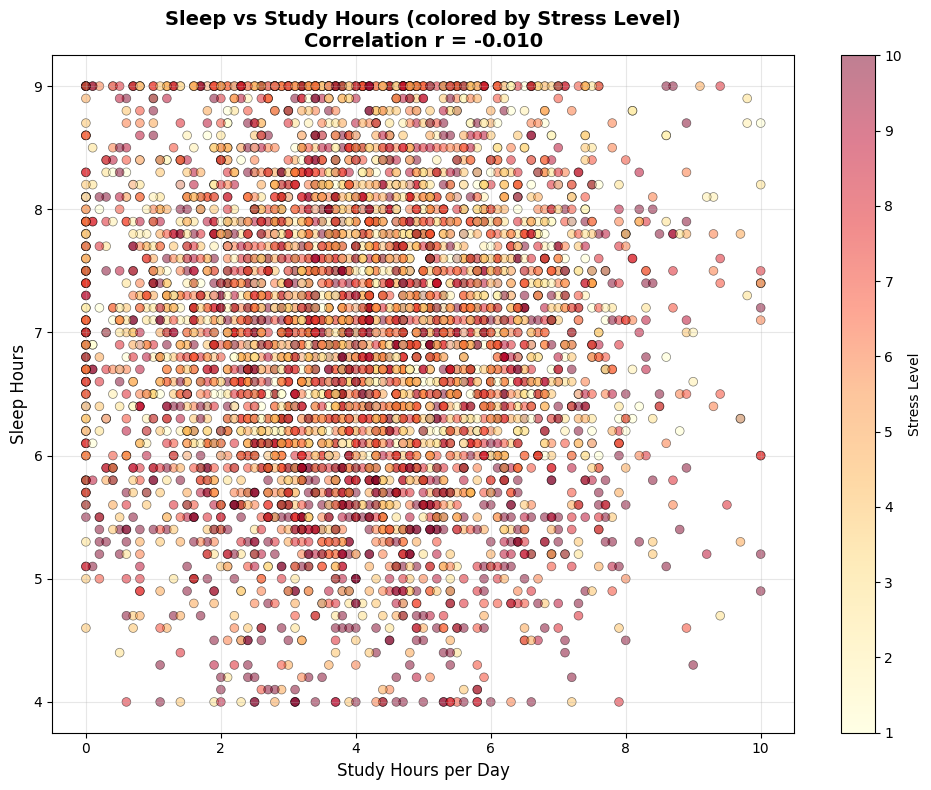

In [14]:
correlation_sleep_study = df_analysis['sleep_hours'].corr(df_analysis['study_hours_per_day']);

plt.figure(figsize=(10, 8));

# Scatter Plot
scatter = plt.scatter(df_analysis['study_hours_per_day'], df_analysis['sleep_hours'], 
                     c=df_analysis['stress_level'], cmap='YlOrRd', 
                     alpha=0.5, s=40, edgecolor='black', linewidth=0.5);

plt.colorbar(scatter, label='Stress Level');
plt.xlabel('Study Hours per Day', fontsize=12);
plt.ylabel('Sleep Hours', fontsize=12);
plt.title(f'Sleep vs Study Hours (colored by Stress Level)\nCorrelation r = {correlation_sleep_study:.3f}', 
          fontsize=14, fontweight='bold');
plt.grid(True, alpha=0.3);
plt.tight_layout();
plt.show();

Skills are relatively balanced across the student population. There is little correlation between different skill types, suggesting the fact that students have diverse strength profiles. 

This insight was reached after performing multivariate analysis between the categorical feature, coding_skill_rating, the categorical feature, communication_skill_rating, and the categorical feature, aptitude_skill_rating.

The top-left countplot (using the bar function) combines the various scores of each student (communication_skill_rating, coding_skill_rating, aptitude_skill_rating) and discretizes it into 3 bins.

The top-right heatmap (using the heatmap function) shows the correlation between various skills.

The bottom-left line plot (using the plot function) maps the average skill level (calculated previously) against the stress_level data, showing an inverse correlation between the two (more stress = lower average skill).

The bottom-right bar graph (using the bar function) compares the average rating of each skill across students, showing that, on average, students have a higher aptitude skill rating in comparison to coding and communication. 

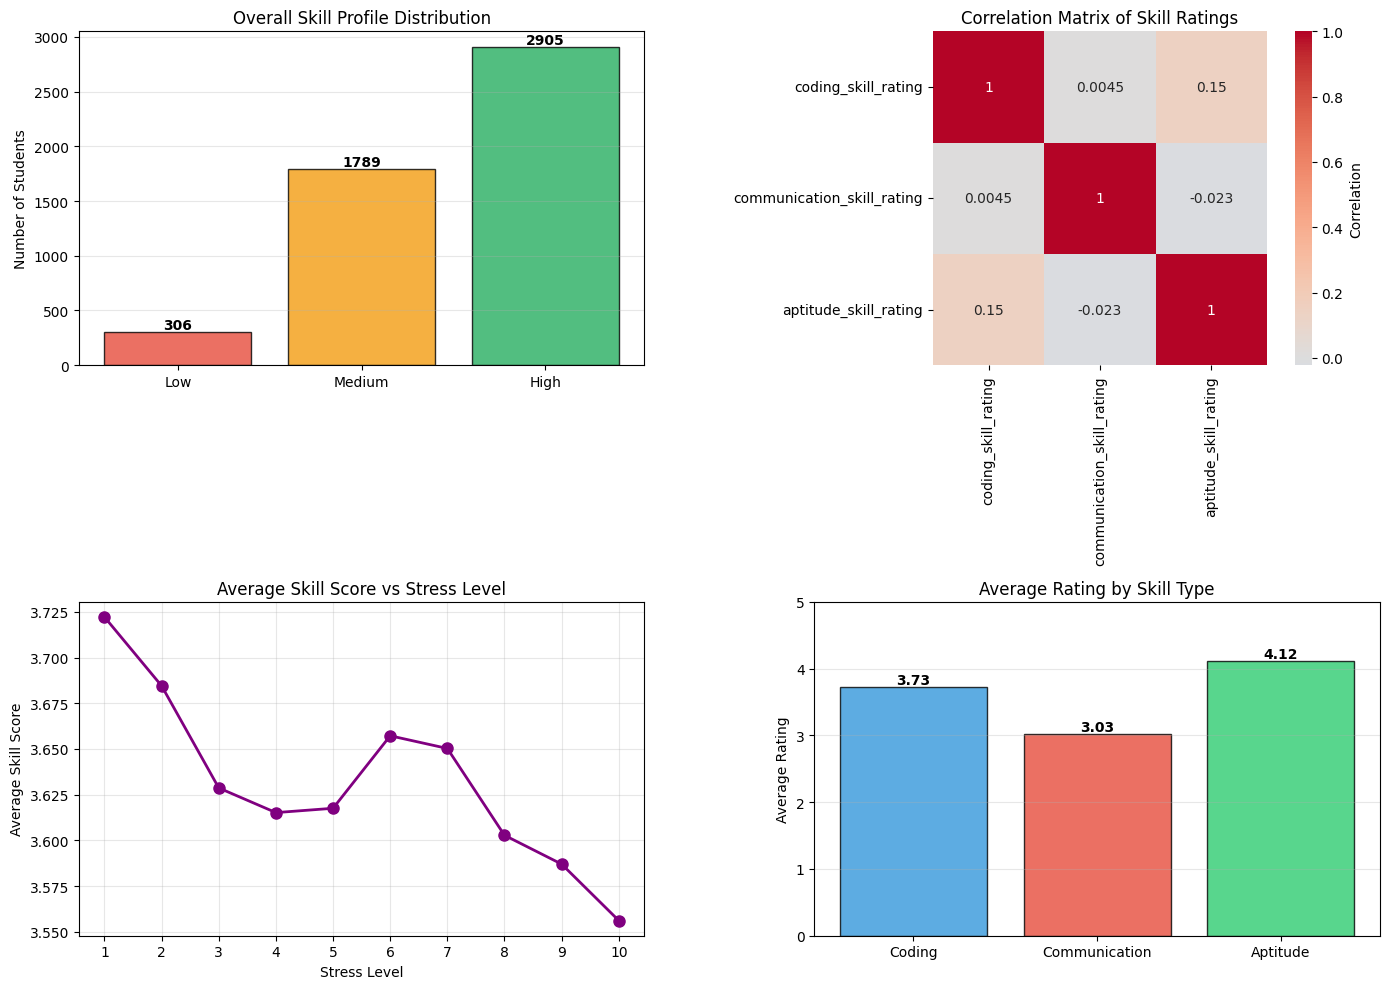

In [15]:
df_analysis['avg_skill_score'] = (df_analysis['coding_skill_rating'] + 
                                   df_analysis['communication_skill_rating'] + 
                                   df_analysis['aptitude_skill_rating']) / 3;

# Categorize based on skill score
def categorize_skills(score):
    if score < 2.5:
        return 'Low';
    elif score < 3.5:
        return 'Medium';
    else:
        return 'High';

df_analysis['skill_category'] = df_analysis['avg_skill_score'].apply(categorize_skills);

fig, axes = plt.subplots(2, 2, figsize=(14, 10));

# Skill Category Distribution Bar Chart
skill_counts = df_analysis['skill_category'].value_counts()[['Low', 'Medium', 'High']]
axes[0, 0].bar(skill_counts.index, skill_counts.values, color=['#e74c3c', '#f39c12', '#27ae60'], 
               edgecolor='black', alpha=0.8);
axes[0, 0].set_ylabel('Number of Students');
axes[0, 0].set_title('Overall Skill Profile Distribution');
axes[0, 0].grid(axis='y', alpha=0.3);
for i, v in enumerate(skill_counts.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold');

# Correlation Heatmap of Skill Ratings
skill_cols = ['coding_skill_rating', 'communication_skill_rating', 'aptitude_skill_rating'];
corr_matrix = df_analysis[skill_cols].corr();
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0, 1], cbar_kws={'label': 'Correlation'});
axes[0, 1].set_title('Correlation Matrix of Skill Ratings');

# Average Skill Score by Stress Level Line Plot
stress_skill = df_analysis.groupby('stress_level')['avg_skill_score'].mean();
axes[1, 0].plot(stress_skill.index, stress_skill.values, marker='o', linewidth=2, 
                markersize=8, color='purple');
axes[1, 0].set_xlabel('Stress Level');
axes[1, 0].set_ylabel('Average Skill Score');
axes[1, 0].set_title('Average Skill Score vs Stress Level');
axes[1, 0].grid(True, alpha=0.3);
axes[1, 0].set_xticks(range(1, 11));

# Individual Skill Comparison Bar Chart
skill_means = df_analysis[skill_cols].mean();
skill_names = ['Coding', 'Communication', 'Aptitude'];
colors_skills = ['#3498db', '#e74c3c', '#2ecc71'];
axes[1, 1].bar(skill_names, skill_means, color=colors_skills, edgecolor='black', alpha=0.8);
axes[1, 1].set_ylabel('Average Rating');
axes[1, 1].set_title('Average Rating by Skill Type');
axes[1, 1].set_ylim([0, 5]);
axes[1, 1].grid(axis='y', alpha=0.3);
for i, v in enumerate(skill_means):
    axes[1, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold');

plt.tight_layout();
plt.show();

This exploratory data analysis of the Indian engineering college placement dataset has demonstrated fundamental exploratory data analysis techniques essential for AI/ML. Through the use of univariate, bivariate, and multivariate analyses, we have shown how to extract meaningful insights from data, ranging from individual feature distributions to relationships between variables. 

References: None